# Kostnads-analyse av Postgården Lyngdal, Stasjongata 26

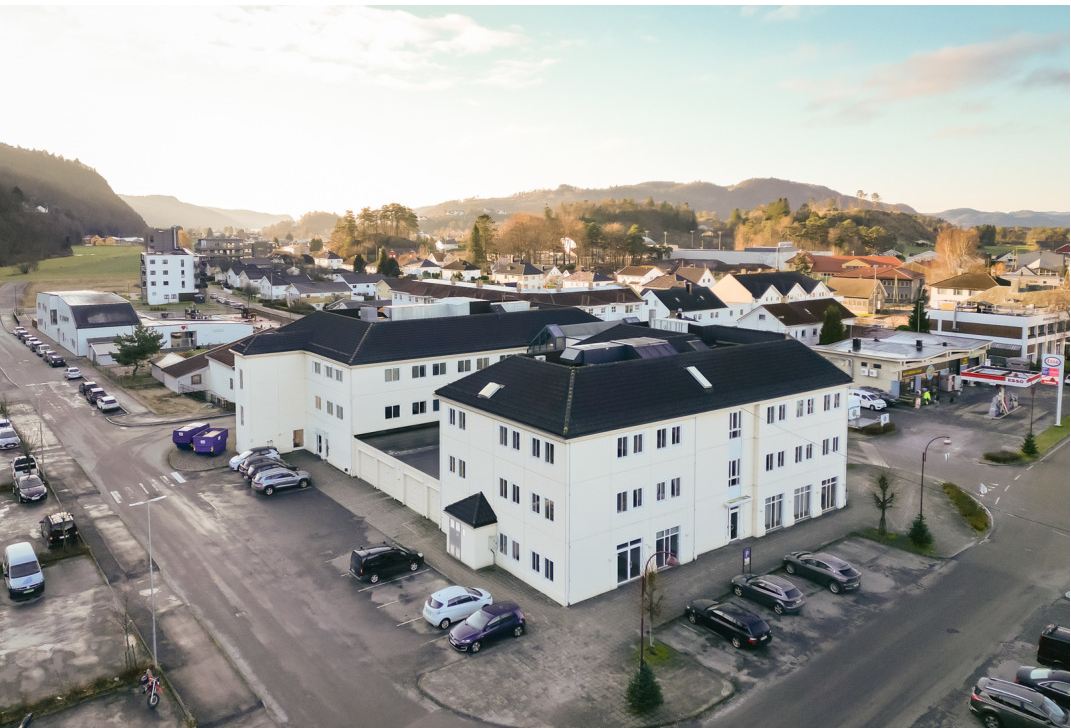

## Grunnflate [m2]

In [79]:
TotaltLeieAreal = 3953

LedigAreal = 773

ErDetKontrolMålt = False # True = det er målt  , False = det er ikke målt

EiendomsAreal = 2300

## Rente, Inflasjon [%/100]

In [80]:
Rente = 0.08

EstimertInflasjon = 0.05 # Anta ca. 10 år

Inflasjon = 1.05

ÅrligPrisStigningBolig = 0.05 # IngenReell

years = 20  # Analysis period


## Pris på objektet

In [81]:

SkattemessigFormuesverdi = 42500500

Eiendomsverdi = 50000000

# Vedlikeholdsutgifter

In [82]:

ÅrligVedlikehold = 1000000 # 25% av leieinntekter tatt som estimat

Energimerket = 'IngenAttest' # Påvirker årlig utgift og mest sannsynlig også ÅrligVedlikehold

Byggeår = 2000

Oppvarming = 'Eletrisk'

Vei = 'Offentlig'

VannOgAvløp = 'Offentlig'

# Leieinntekter

In [83]:
AntallLeieEnheter = 5

ÅrligLeieInntekt = 3950000

# Kalkuler årlig inntekt etter vedlikehold
NettoÅrligLeieInntekt = ÅrligLeieInntekt - ÅrligVedlikehold

## Maks tillate kjøpspris

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

years = 20  # Analysis period

# Define the NPV function including property appreciation
def npv(eiendomsverdi):
    npv_value = -float(eiendomsverdi)  # Initial cost of the property
    final_property_value = eiendomsverdi * ((1 + ÅrligPrisStigningBolig) ** years)  # Estimated value at the end of the period

    for year in range(1, years + 1):
        adjusted_leieinntekt = ÅrligLeieInntekt * ((1 + EstimertInflasjon) ** year)
        adjusted_vedlikehold = ÅrligVedlikehold * ((1 + EstimertInflasjon) ** year)
        cash_flow = (adjusted_leieinntekt - adjusted_vedlikehold - eiendomsverdi * Rente) / (1 + Rente) ** year
        npv_value += cash_flow

    # Add the final property value to the NPV, discounted to present value
    npv_value += final_property_value / (1 + Rente) ** years

    return npv_value

# Estimate initial guess
initial_guess = [50000000]  # Make sure to pass it as a list to fsolve

# Solve for NPV = 0 using fsolve
solution = fsolve(npv, initial_guess)

print(f"The property value where NPV equals zero over 20 years, considering inflation and property value appreciation, is approximately: {solution[0]:.2f}")



The property value where NPV equals zero over 20 years, considering inflation and property value appreciation, is approximately: 36568152.75


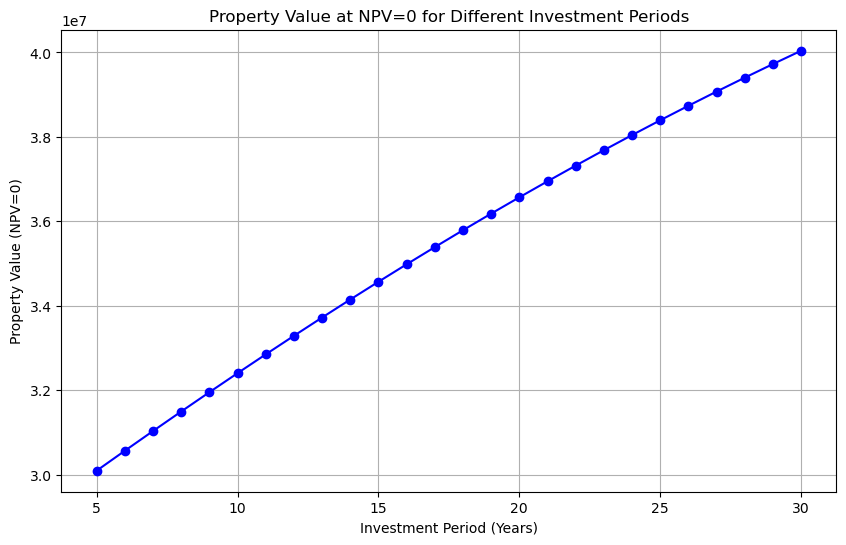

In [85]:
# Define input variables
ÅrligLeieInntekt = 3950000
ÅrligVedlikehold = 1000000
Rente = 0.08
Inflasjon = 0.05  # Inflation rate for income and expenses
ÅrligPrisStigningBolig = 0.05  # Annual property value appreciation

# Define the range of years to analyze
year_range = range(5, 31)  # From 5 to 30 years

# Define the NPV function including property appreciation
def npv(eiendomsverdi, years):
    npv_value = -float(eiendomsverdi)  # Initial cost of the property
    final_property_value = eiendomsverdi * ((1 + ÅrligPrisStigningBolig) ** years)  # Estimated value at the end of the period

    for year in range(1, years + 1):
        adjusted_leieinntekt = ÅrligLeieInntekt * ((1 + Inflasjon) ** year)
        adjusted_vedlikehold = ÅrligVedlikehold * ((1 + Inflasjon) ** year)
        cash_flow = (adjusted_leieinntekt - adjusted_vedlikehold - eiendomsverdi * Rente) / (1 + Rente) ** year
        npv_value += cash_flow

    # Add the final property value to the NPV, discounted to present value
    npv_value += final_property_value / (1 + Rente) ** years

    return npv_value

# Function to find the property value that sets NPV to zero
def find_zero_npv(years):
    # Estimate initial guess
    initial_guess = [50000000]  # Make sure to pass it as a list to fsolve
    solution = fsolve(npv, initial_guess, args=(years,))
    return solution[0]

# Calculate zero-NPV property values for each year in the range
property_values = [find_zero_npv(year) for year in year_range]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(year_range, property_values, marker='o', linestyle='-', color='b')
plt.title('Property Value at NPV=0 for Different Investment Periods')
plt.xlabel('Investment Period (Years)')
plt.ylabel('Property Value (NPV=0)')
plt.grid(True)
plt.show()